In [66]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("smart_grid_stability_augmented.csv")

# Preparation of Data 

In [3]:
Data.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [42]:
Data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [43]:
print("Number of NaN data is: ",Data.isna().sum().sum())

Number of NaN data is:  0


In [4]:
X = Data.drop(columns="stabf")
X.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383


In [5]:
Y = Data.stabf
Y.head(10)

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
5      stable
6    unstable
7    unstable
8      stable
9    unstable
Name: stabf, dtype: object

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

## Data Visualisation

In [15]:
Data.shape

(60000, 14)

In [20]:
sample = Data.sample(frac=0.1/6)
sample.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
33868,8.839713,6.494969,1.238902,5.461055,4.817931,-1.685969,-1.263858,-1.868103,0.699999,0.541919,0.949741,0.315546,0.008813,unstable
34685,1.865163,8.246532,1.457095,0.811129,3.830324,-1.522496,-1.304276,-1.003552,0.688097,0.117692,0.448756,0.652909,-0.064156,stable
23983,4.620482,5.058606,2.404616,1.720002,2.905195,-0.512736,-1.494715,-0.897743,0.302464,0.497955,0.248805,0.102531,-0.037208,stable
54429,7.518432,8.356024,4.534128,3.400430,4.830026,-1.819772,-1.620795,-1.389459,0.316208,0.421363,0.156308,0.926073,0.011184,unstable
9715,7.075942,3.826718,7.067460,3.557865,3.118274,-0.956134,-1.425720,-0.736421,0.872640,0.867165,0.411875,0.677713,0.070803,unstable


In [21]:
sample.shape

(1000, 14)

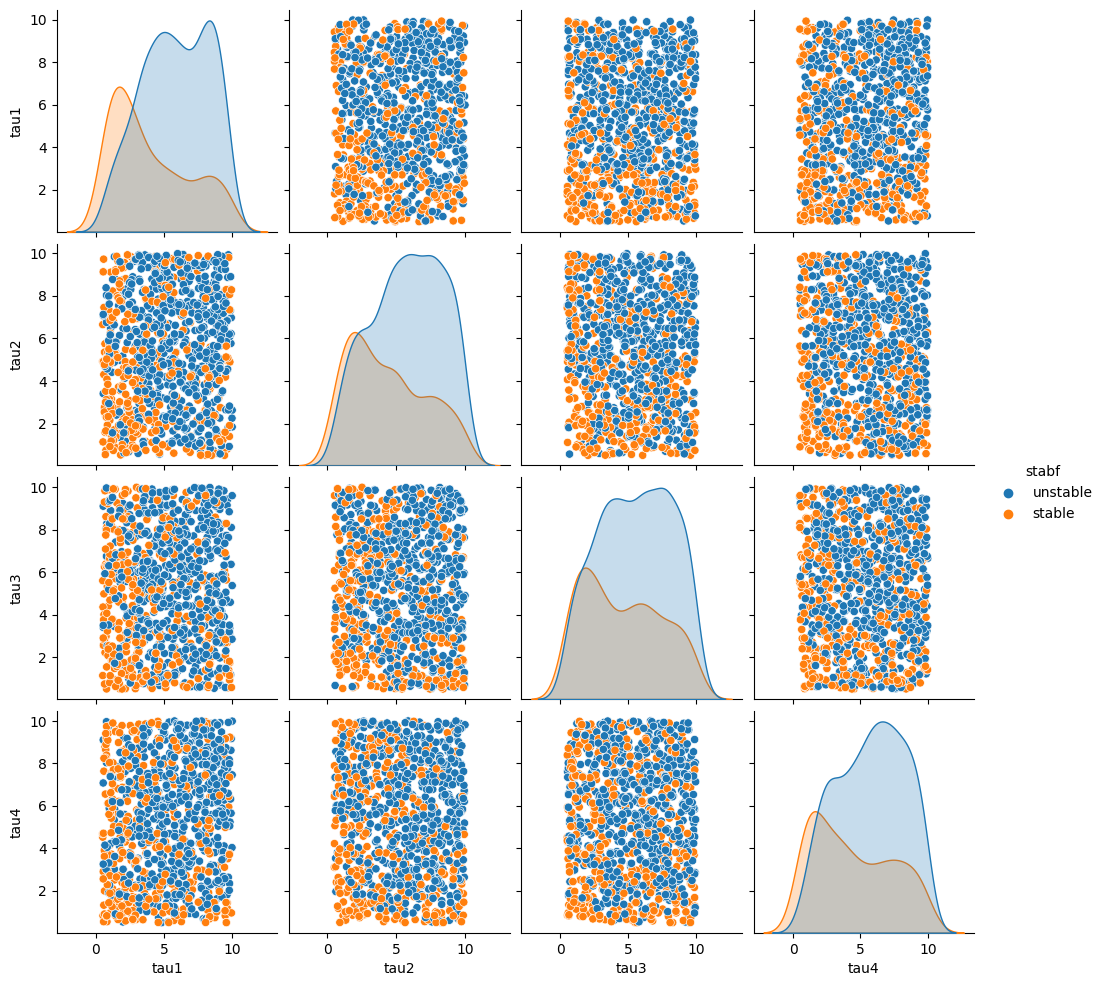

In [38]:
sns.pairplot(sample[["tau1",	"tau2",	"tau3",	"tau4","stabf"]],hue="stabf")

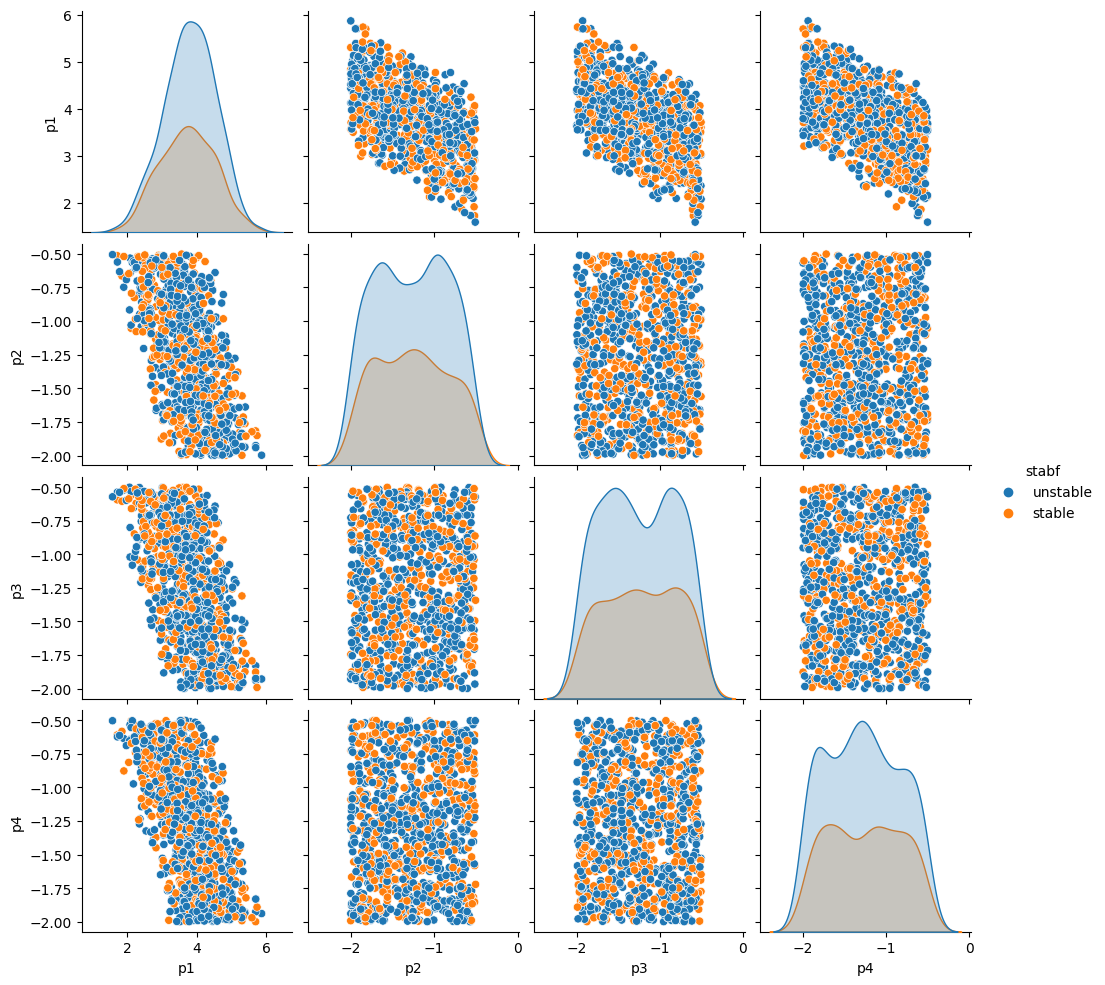

In [39]:
sns.pairplot(sample[["p1","p2","p3","p4","stabf"]],hue="stabf")

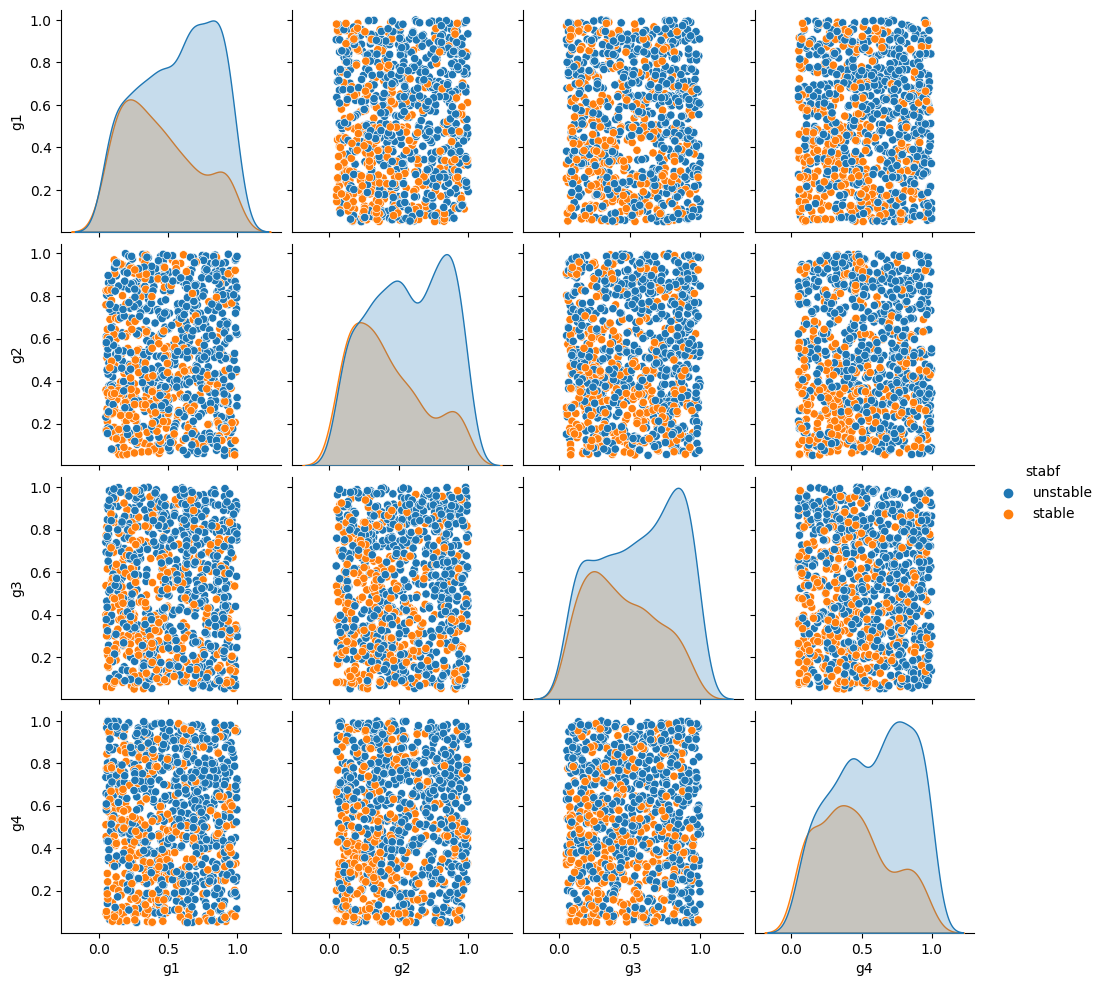

In [40]:
sns.pairplot(sample[["g1","g2","g3","g4","stabf"]],hue="stabf")

<ipython-input-48-cfe6261c5754>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

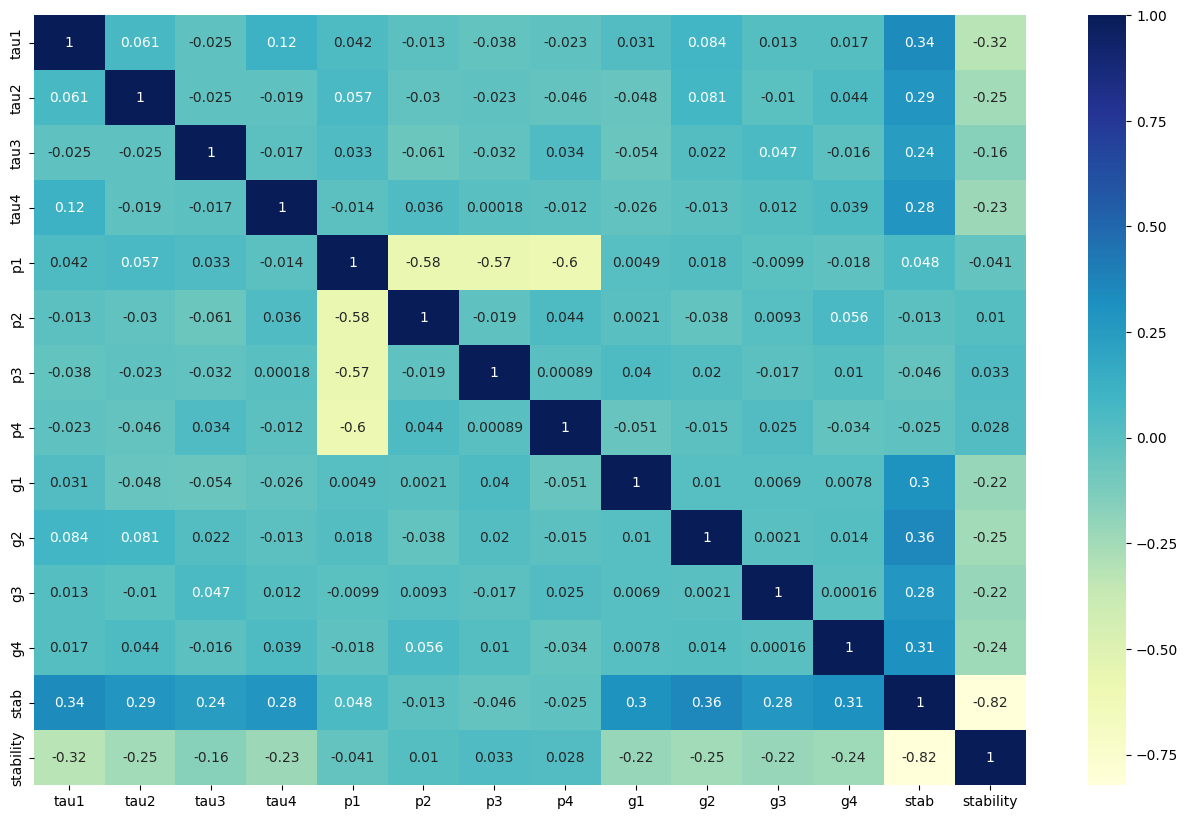

In [48]:
plt.figure(figsize=(16,10))
sns.heatmap(sample.corr(), annot = True, cmap = "YlGnBu") 

# We will solve the classification and prediction problem of the stability of a Smart Grid system with multiple ML algorithms, and compare all these algorithms.
Check this link for data source : 
https://www.kaggle.com/datasets/pcbreviglieri/smart-grid-stability

# Logistic Regression 

In [50]:
Model = LogisticRegression()

In [51]:
Model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9625833333333333


# Decision Tree 

In [59]:
Model = DecisionTreeClassifier()

In [60]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [61]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  1.0


# Random Forest 

In [63]:
Model = RandomForestClassifier()

In [64]:
Model.fit(X_train,Y_train)

RandomForestClassifier()

In [65]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  1.0


# KNN

In [70]:
Model = KNeighborsClassifier()

In [71]:
Model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [72]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.8278333333333333


In [73]:
score_list = []
for i in range(100):  
  KNN = KNeighborsClassifier(n_neighbors=i+1)
  KNN.fit(X_train,Y_train)
  S = KNN.score(X_test,Y_test)
  score_list.append(S)

In [77]:
print(score_list)

[0.81125, 0.7796666666666666, 0.81475, 0.80575, 0.81975, 0.8184166666666667, 0.82275, 0.8245833333333333, 0.8273333333333334, 0.8275, 0.8278333333333333, 0.8270833333333333, 0.8219166666666666, 0.8235833333333333, 0.8218333333333333, 0.8256666666666667, 0.82375, 0.82625, 0.8246666666666667, 0.8255833333333333, 0.8241666666666667, 0.8249166666666666, 0.82225, 0.822, 0.82025, 0.8211666666666667, 0.819, 0.82075, 0.8185833333333333, 0.8206666666666667, 0.8194166666666667, 0.82125, 0.8195, 0.81975, 0.8189166666666666, 0.82125, 0.8175833333333333, 0.8185, 0.81675, 0.8184166666666667, 0.8176666666666667, 0.8178333333333333, 0.8171666666666667, 0.8180833333333334, 0.8161666666666667, 0.816, 0.8138333333333333, 0.8159166666666666, 0.8148333333333333, 0.8155, 0.8145833333333333, 0.8156666666666667, 0.8154166666666667, 0.8168333333333333, 0.81425, 0.8159166666666666, 0.8145833333333333, 0.8160833333333334, 0.8139166666666666, 0.8149166666666666, 0.8135, 0.8139166666666666, 0.81225, 0.81325, 0.811

In [74]:
print("Maximum accuracy: ",max(score_list), "with K equal: ",score_list.index(max(score_list))+1)

Maximum accuracy:  0.8278333333333333 with K equal:  11


In [76]:
Model = KNeighborsClassifier(n_neighbors=score_list.index(max(score_list))+1)
Model.fit(X_train,Y_train)
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.8278333333333333


# Naive Bayes Classifier

In [78]:
model = GaussianNB()

In [79]:
Model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [80]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.8278333333333333


# Support Vector Machine 

In [84]:
# Linear kernel 
Model = SVC(kernel = 'linear')

In [85]:
Model.fit(X_train,Y_train)

SVC(kernel='linear')

In [86]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9836666666666667


In [87]:
# Polynomial kernel
Model = SVC(kernel = 'poly')

In [88]:
Model.fit(X_train,Y_train)

SVC(kernel='poly')

In [89]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9456666666666667


In [90]:
#Radial basis function kernel
Model = SVC(kernel = 'rbf')

In [91]:
Model.fit(X_train,Y_train)

SVC()

In [92]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9329166666666666


In [93]:
#Sigmoid Kernel
Model = SVC(kernel = 'sigmoid')

In [94]:
Model.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [95]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.39108333333333334
